In [42]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from scipy.interpolate import interp1d, interp2d, splrep, splev

from itertools import islice, tee

In [19]:
data = np.loadtxt('route.csv', delimiter=',', dtype=float)
data = data[:, :2]
print(data)

x = data[:, 0]
y = data[:, 1]

[[ 25.33833313  -4.86038351]
 [  3.47695994 -19.14937592]
 [ -0.5        -19.56574249]
 [ -2.74490452 -19.43406105]
 [-19.68591499  -4.96807814]
 [-20.44574356   0.38      ]
 [-20.38011551   1.96617115]
 [-18.16772842   9.4515028 ]
 [-17.08514214  16.64377213]
 [-11.74878883  26.60116386]
 [-10.09282017  40.65314484]
 [-10.07348728  42.62850952]
 [ -9.56891441 122.3712616 ]
 [ -9.4376936  143.10942078]
 [ -9.31491089 162.51391602]
 [-30.         167.        ]]


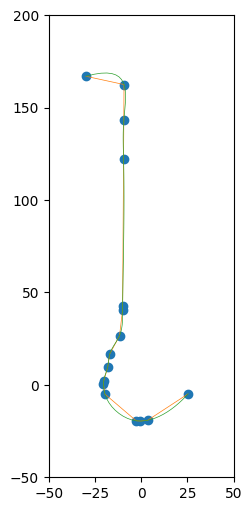

In [53]:
d = [0]

for a, b in zip(data[:-1,:], data[1:,:]):
    d.append(distance.euclidean(a, b))

d = np.cumsum(d)

xip = interp1d(d, x, kind='cubic')
yip = interp1d(d, y, kind='cubic')

d_ = np.linspace(d[0], d[-1], 100)

x_ = xip(d_)
y_ = yip(d_)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='data')
plt.plot(x, y, '-', label='linear', linewidth=0.5)
plt.plot(x_, y_, '-', label='cubic', linewidth=0.5)
plt.axis('scaled')
# plt.legend()
plt.xlim(-50, 50)
plt.ylim(-50, 200)
plt.show()

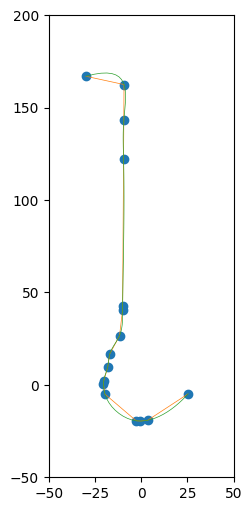

In [63]:
d = [0]

for a, b in zip(data[:-1,:], data[1:,:]):
    d.append(distance.euclidean(a, b))

d = np.cumsum(d)

interpolator = interp1d(d, np.stack((x, y), axis=1), kind='cubic', axis=0)

interpolated_x = np.linspace(d[0], d[-1], 100)
interpolated_y = interpolator(interpolated_x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='data')
plt.plot(x, y, '-', label='linear', linewidth=0.5)
plt.plot(interpolated_y[:,0], interpolated_y[:,1], '-', label='cubic', linewidth=0.5)
plt.axis('scaled')
# plt.legend()
plt.xlim(-50, 50)
plt.ylim(-50, 200)
plt.show()


TypeError: m > k must hold

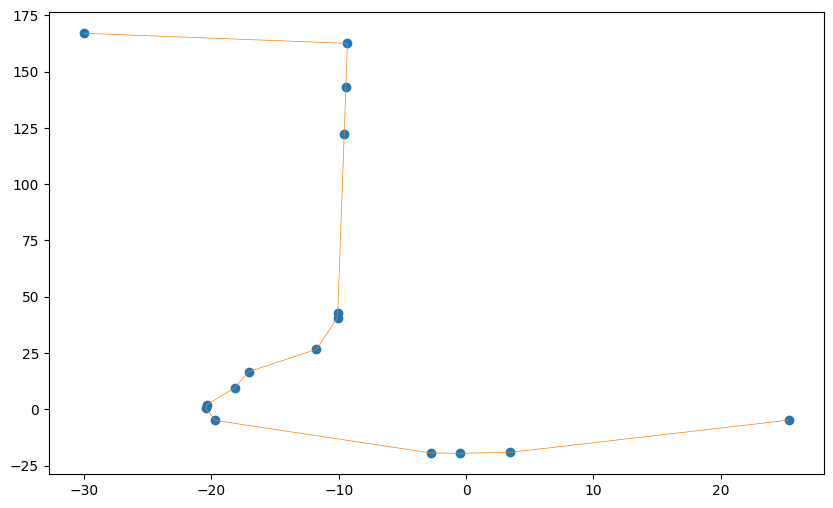

In [44]:
cubic = sp.interpolate.interp1d(x, y, kind='cubic')

x_ = np.linspace(x.min(), x.max(), 10)
y_ = cubic(x_)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='data')
plt.plot(x, y, '-', label='linear', linewidth=0.5)
# plt.plot(x_, y_, '-', label='cubic spline', linewidth=0.5)

# for a, b in zip(data[:-1,:], data[1:,:]):
#     xs=np.linspace(a[0], b[0], 10)
#     ys=np.linspace(a[1], b[1], 10)
#
#     plt.plot(xs, ys, 'x', label='linear')

def each_cons(sequence, n):
    return zip(
        *(
            islice(g, i, None)
            for i, g in
            enumerate(tee(sequence, n))
        )
    )

for a, b, c in each_cons(data, 3):
    x_ = [a[0], b[0], c[0]]
    y_ = [a[1], b[1], c[1]]

    bspl = splrep(x_, y_, s=5)
    bspl_y = splev(x_, bspl)

    plt.plot(bspl, bspl_y, '-', label='cubic', linewidth=0.5)


plt.axis('scaled')
# plt.legend()
plt.show()
